<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png">

## Sci-kit learn - https://scikit-learn.org/stable/



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np


#### Importing Dataset

In [3]:
ls dataset/

Ecommerce Customers*    gdp.csv*                shiller.csv*
USA_Housing.csv*        ginzberg.csv*           unemployment-macro.csv*
economics.csv*          monthly-hpi.csv*
fed_funds.csv*          seasons.csv*


In [4]:
df = pd.read_csv('dataset/USA_Housing.csv')

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
%matplotlib inline

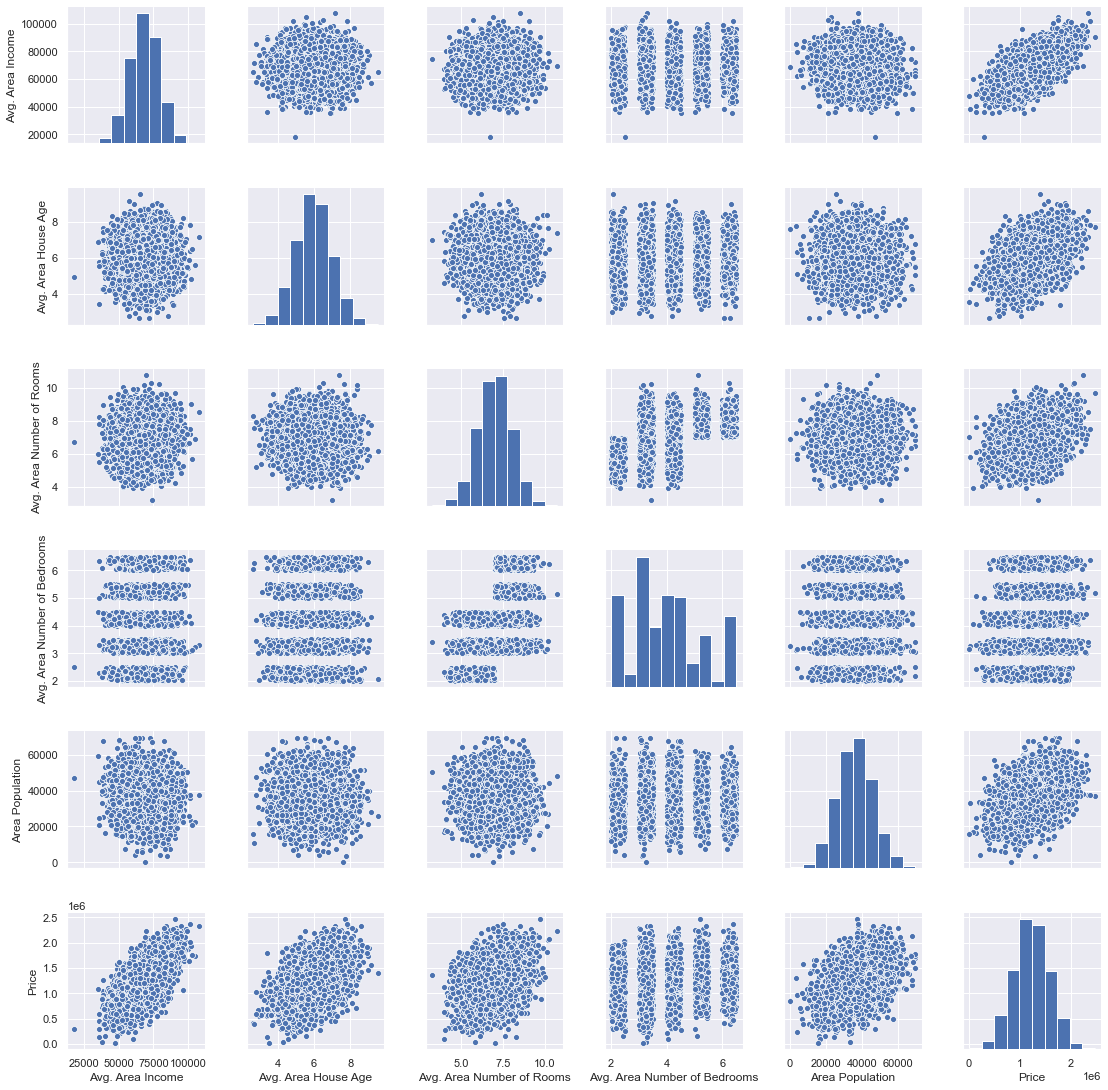

In [12]:
sns.pairplot(df)

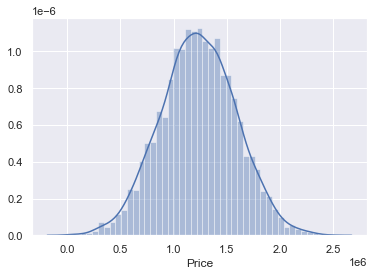

In [13]:
sns.distplot(df['Price'])

#### Price - target variable

It is normally distributed centered around mean - 123K

In [14]:
df['Price'].mean()

1232072.65414236

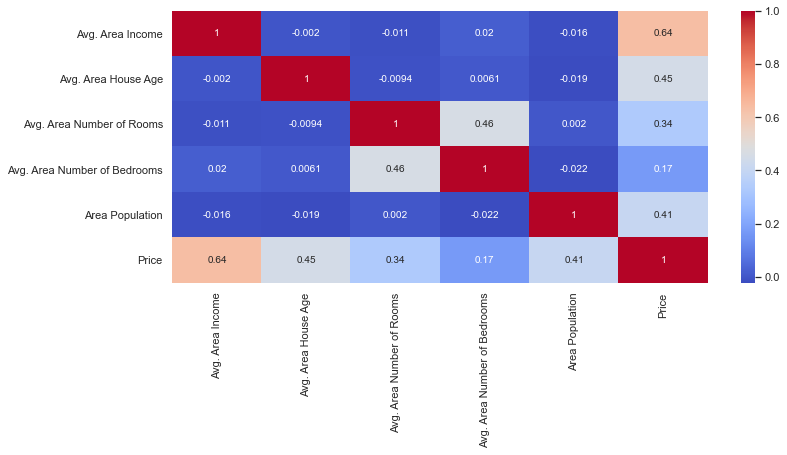

In [15]:
plt.figure(figsize=(12,5))

sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

#### Training linear regression model

In [16]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [17]:
# Separate out dependent and independent variables

In [18]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = df['Price']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.shape

(4000, 5)

In [23]:
X_test.shape

(1000, 5)

In [21]:
df.shape

(5000, 7)

#### Creating and training model

In [24]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

#### Evaluation

In [25]:
print(lm.intercept_)

-2635072.900931357


In [26]:
print(lm.coef_)

[2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


In [27]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['coefficients'])

In [28]:
coeff_df

,coefficients
Avg. Area Income,21.652206
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Area Population,15.270313


#### Predictions

In [29]:
y_pred = lm.predict(X_test)

In [30]:
y_pred

array([1308587.92699716, 1237037.22949393, 1243429.34030719,
       1228900.21360433, 1063320.90710754, 1544058.05034821,
       1094774.70493033,  833284.72339247,  788412.85578753,
       1469714.86615697,  671728.43662091, 1606818.21977779,
       1004166.61331046, 1796798.97595969, 1288566.96220954,
       1087782.93301085, 1423072.37492492, 1078178.68169648,
        802286.03537916,  930761.03695738, 1134829.86477804,
        916398.42023086, 1489972.69335358, 1284580.15538839,
       1582071.35322689, 1132519.15992001, 1089888.3964449 ,
        974510.51872176,  924057.96820795, 1740759.72092218,
       1286481.59512374, 1621289.95171618, 1435264.20161697,
       1234014.77924526, 1485434.5730037 , 1718335.007536  ,
       1538953.74882765,  777106.64791828, 1765201.52243599,
       1175972.1419983 , 1553707.94323479,  897703.67505166,
       1371049.80326601,  845281.72310351, 1201022.89803858,
       1133285.98450794, 1363128.14557392, 1449814.08768222,
       1574363.90467325,

In [31]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
4711    1.107031e+06
2313    1.405505e+06
3214    1.924156e+06
2732    1.571254e+06
1926    8.831475e+05
Name: Price, Length: 1000, dtype: float64

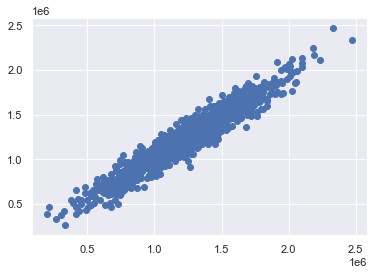

In [32]:
plt.scatter(y_test,y_pred)

#### Regression Eval Metrics

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R-Squared : {r2_score(y_test,y_pred)}')

Mean Absolute Error : 80879.09723487175
Mean Squared Error : 10089009300.890955
Root Mean Squared Error : 100444.06055556971
R-Squared : 0.9179971706834578


## HW

1. Try this dataset with Statsmodels


2. Try the HPI dataset with SKlearn

# Great Job !!